In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords', 'punkt', 'wordnet', 'omw-1.4','vader_lexicon'])


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oluwadarasimioloyede/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/oluwadarasimioloyede/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/oluwadarasimioloyede/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/oluwadarasimioloyede/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/oluwadarasimioloyede/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
simple_text='This isn\'t a real text, this is an example text...Notice this contains punctuation!!'

In [3]:
tokenizer = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+')
tokenized_document = tokenizer.tokenize(simple_text)
print(tokenized_document)

['This', "isn't", 'a', 'real', 'text', 'this', 'is', 'an', 'example', 'text', 'Notice', 'this', 'contains', 'punctuation']


In [4]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
# cleaned_tokens = []
cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
print(cleaned_tokens)

['real', 'text', 'example', 'text', 'notice', 'contains', 'punctuation']


In [6]:
lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer = nltk.stem.PorterStemmer()

words = ['cacti', 'sings','hopped','rocks','better','easily']
pos = ['n','v','v','n','a','r']

lemmatized_words=[lemmatizer.lemmatize(words[i], pos=pos[i]) for i in range(6)]
stemmed_words = [stemmer.stem(word)for word in words]

print("Lemmatized words: ", lemmatized_words)
print("Stemmed words: ", stemmed_words)

Lemmatized words:  ['cactus', 'sing', 'hop', 'rock', 'good', 'easily']
Stemmed words:  ['cacti', 'sing', 'hop', 'rock', 'better', 'easili']


In [7]:
stemmed_text = [stemmer.stem(word)for word in cleaned_tokens]
print(stemmed_text)

['real', 'text', 'exampl', 'text', 'notic', 'contain', 'punctuat']


In [8]:
def preprocess_text(text):
    tokenized_document = tokenizer.tokenize(text)
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
    stemmed_text = [stemmer.stem(word)for word in cleaned_tokens]
    return stemmed_text

In [9]:
data = pd.read_csv("SMSSpamCollection.txt", sep='\t', header=None)
data.columns = ["Target_Label","Text"]

data.head()

,Target_Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
print("All Data Labels")
print(data.groupby("Target_Label").count())

All Data Labels
              Text
Target_Label      
ham           4825
spam           747


In [11]:
data['Text'] = data['Text'].apply(preprocess_text)
data.head()

,Target_Label,Text
0,ham,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,"[ok, lar, joke, wif, u, oni]"
2,spam,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"[nah, think, goe, usf, live, around, though]"


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(data['Text'].map(lambda tokens: ' '.join(tokens)))
x = pd.DataFrame(x.toarray())
x.head()

,0,1,2,3,4,5,6,7,8,9,...,7274,7275,7276,7277,7278,7279,7280,7281,7282,7283
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
from sklearn.model_selection import train_test_split

y = data["Target_Label"]
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.8, test_size=0.2, random_state=22)


<Axes: xlabel='Target_Label', ylabel='count'>

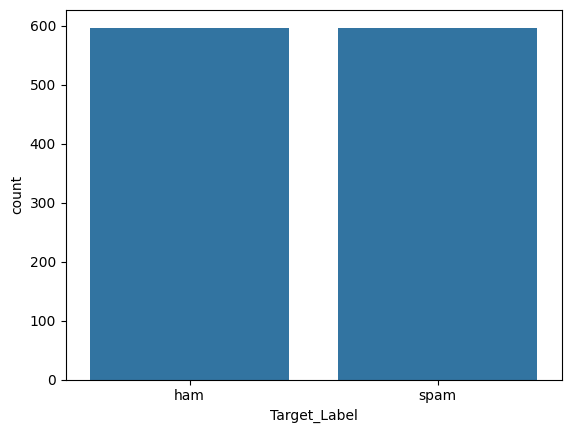

In [14]:
from imblearn.under_sampling import RandomUnderSampler

resampler = RandomUnderSampler(random_state=0)
x_train_undersampled, y_train_undersampled = resampler.fit_resample(x_train, y_train)

sns.countplot(x=y_train_undersampled)

In [15]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train_undersampled ,y_train_undersampled)

MultinomialNB()

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = model.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print("Accuracy: ", acc)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)
print('-----------------------------------------------------')
result = classification_report(y_test, y_pred)
print("Classification Report: ",)
print (result)

Accuracy:  0.9488789237668162
Confusion Matrix: 
[[912  53]
 [  4 146]]
-----------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

         ham       1.00      0.95      0.97       965
        spam       0.73      0.97      0.84       150

    accuracy                           0.95      1115
   macro avg       0.86      0.96      0.90      1115
weighted avg       0.96      0.95      0.95      1115



## SENTIMENT ANALYSIS

In [17]:
print(preprocess_text('This movie is great!'))
print(preprocess_text('This movie is not great!'))

['movi', 'great']
['movi', 'great']


In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

print(sentiment.polarity_scores('This movie is great!'))
print(sentiment.polarity_scores('This movie is not great'))

{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}
{'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'compound': -0.5096}


In [19]:
reviews = pd.read_csv('Reviews_of_Amazon_Products.csv')

reviews.head()

,Category,name,brand,primaryCategories,reviews.date,reviews.text,reviews.title,reviews.username
0,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2017-09-03T00:00:00.000Z,I thought it would be as big as small paper bu...,Too small,llyyue
1,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2017-06-06T00:00:00.000Z,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi
2,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2018-04-20T00:00:00.000Z,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo
3,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2017-11-02T17:33:31.000Z,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry
4,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2018-04-24T00:00:00.000Z,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack


In [20]:
reviews.describe()

,Category,name,brand,primaryCategories,reviews.date,reviews.text,reviews.title,reviews.username
count,1123,1123,1123,1123,1123,1123,1123,1123
unique,2,7,1,2,237,1048,820,983
top,Tablet,"Fire HD 8 Tablet, Wi-Fi, 16 GB-Magenta",Amazon,Electronics,2017-01-23T00:00:00.000Z,I am really enjoying my new kindle fire hd 8. ...,Great tablet,Mike
freq,1016,797,1123,1112,48,3,56,5


In [21]:
reviews['compound'] = [sentiment.polarity_scores(review)['compound'] for review in reviews['reviews.text']]
reviews['neg'] = [sentiment.polarity_scores(review)['neg'] for review in reviews['reviews.text']]
reviews['neu'] = [sentiment.polarity_scores(review)['neu'] for review in reviews['reviews.text']]
reviews['pos'] = [sentiment.polarity_scores(review)['pos'] for review in reviews['reviews.text']]

In [22]:
reviews.head()

,Category,name,brand,primaryCategories,reviews.date,reviews.text,reviews.title,reviews.username,compound,neg,neu,pos
0,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2017-09-03T00:00:00.000Z,I thought it would be as big as small paper bu...,Too small,llyyue,0.7329,0.081,0.709,0.210
1,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2017-06-06T00:00:00.000Z,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,0.5826,0.000,0.744,0.256
2,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2018-04-20T00:00:00.000Z,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,0.3612,0.085,0.772,0.143
3,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2017-11-02T17:33:31.000Z,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,0.9727,0.000,0.843,0.157
4,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2018-04-24T00:00:00.000Z,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,0.9072,0.000,0.661,0.339


In [23]:
reviews[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,1123.000000,1123.000000,1123.000000,1123.000000
mean,0.623324,0.033545,0.694907,0.271563
std,0.347236,0.058432,0.147549,0.152466
min,-0.867400,0.000000,0.230000,0.000000
25%,0.493900,0.000000,0.592000,0.163000
50%,0.750600,0.000000,0.705000,0.259000
75%,0.865800,0.055500,0.800500,0.380000
max,0.999200,0.475000,1.000000,0.689000


<Axes: xlabel='compound', ylabel='Count'>

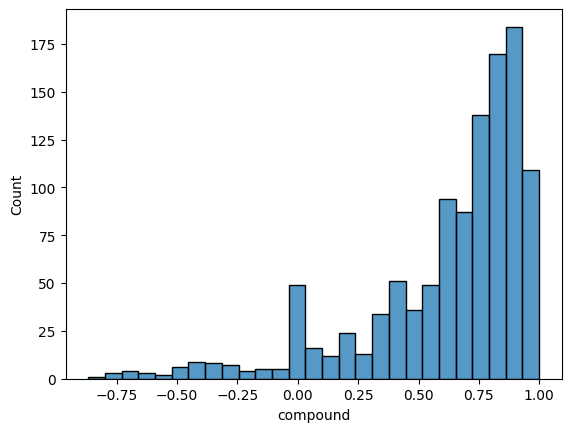

In [24]:
sns.histplot(reviews['compound'])

<Axes: xlabel='pos', ylabel='Count'>

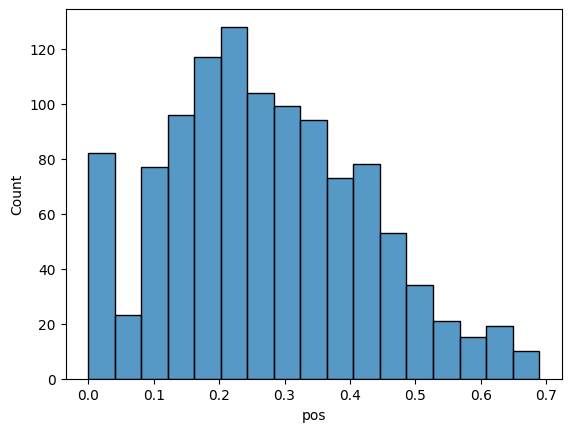

In [25]:
sns.histplot(reviews['pos'])

<Axes: xlabel='neg', ylabel='Count'>

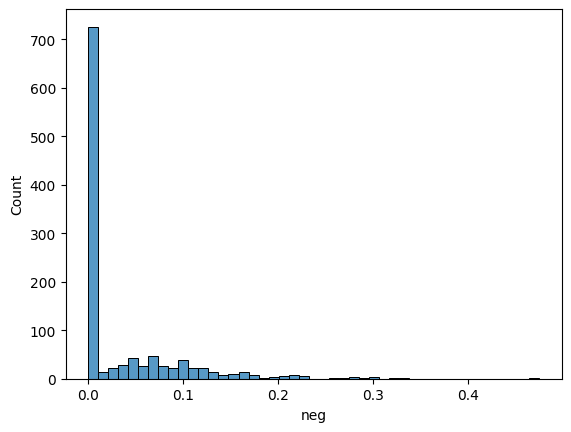

In [26]:
sns.histplot(reviews['neg'])

In [27]:
(reviews['compound']<=0).groupby(reviews['name']).sum()

name
Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)                                         12
Fire HD 8 Tablet,  Wi-Fi, 16 GB-Magenta                                                       67
Fire HD 8 Tablet,  Wi-Fi, 32 GB-Black                                                          5
Fire HD 8 Tablet,  Wi-Fi, 32 GB-Magenta                                                        5
Fire HD 8 Tablet, Wi-Fi, 16 GB-Blue                                                            1
Fire HD 8 Tablet, Wi-Fi, 32 GB-Blue                                                           10
Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers     1
Name: compound, dtype: int64

In [28]:
percent_negative = pd.DataFrame((reviews['compound']<=0).groupby(reviews['name']).sum()
                                /reviews['name'].groupby(reviews['name']).count()*100, columns=['% negative reviews']).sort_values(by='% negative reviews')
percent_negative

,% negative reviews
name,
"Fire HD 8 Tablet, Wi-Fi, 16 GB-Blue",1.960784
"Fire HD 8 Tablet, Wi-Fi, 16 GB-Magenta",8.406524
"Fire HD 8 Tablet, Wi-Fi, 32 GB-Black",8.620690
"Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers",9.090909
"Amazon Kindle E-Reader 6"" Wifi (8th Generation, 2016)",12.500000
"Fire HD 8 Tablet, Wi-Fi, 32 GB-Magenta",12.500000
"Fire HD 8 Tablet, Wi-Fi, 32 GB-Blue",14.285714


<Axes: xlabel='% negative reviews', ylabel='name'>

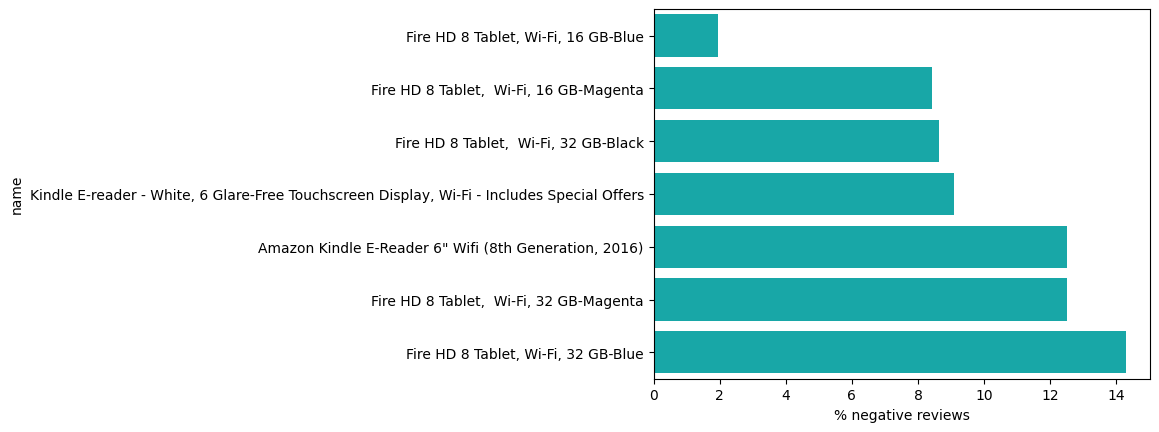

In [29]:
sns.barplot(data=percent_negative, x= "% negative reviews", y=percent_negative.index, color='c')

In [30]:
reviews['processed_review'] = reviews['reviews.text'].apply(preprocess_text)

reviews_positive_subset = reviews.loc[(reviews['name'] == 'Fire HD 8 Tablet,  Wi-Fi, 16 GB-Magenta') & (reviews['compound'] > 0), :]

reviews_positive_subset.head()


,Category,name,brand,primaryCategories,reviews.date,reviews.text,reviews.title,reviews.username,compound,neg,neu,pos,processed_review
228,Tablet,"Fire HD 8 Tablet, Wi-Fi, 16 GB-Magenta",Amazon,Electronics,2017-03-18T00:00:00.000Z,This was bought to replace my old Kindle with ...,Great picture quality,Janet,0.6476,0.0,0.901,0.099,"[bought, replac, old, kindl, keypad, experimen..."
229,Tablet,"Fire HD 8 Tablet, Wi-Fi, 16 GB-Magenta",Amazon,Electronics,2016-12-23T00:00:00.000Z,outstanding replacement tablet for my outdated...,kindle fire hd8 2016,wallymich,0.6124,0.0,0.667,0.333,"[outstand, replac, tablet, outdat, overpr, ipa..."
230,Tablet,"Fire HD 8 Tablet, Wi-Fi, 16 GB-Magenta",Amazon,Electronics,2017-01-28T00:00:00.000Z,This is a great tablet for the price. I have o...,Great tablet,Linda,0.6249,0.0,0.868,0.132,"[great, tablet, price, one, purchas, year, ago..."
231,Tablet,"Fire HD 8 Tablet, Wi-Fi, 16 GB-Magenta",Amazon,Electronics,2016-12-24T00:00:00.000Z,"She hasn't used the it yet, but my son did a q...",Christmas gift for my daughter,flex3117,0.2960,0.0,0.879,0.121,"[use, yet, son, quick, check, seem, fine]"
232,Tablet,"Fire HD 8 Tablet, Wi-Fi, 16 GB-Magenta",Amazon,Electronics,2017-04-13T00:00:00.000Z,I have had a few kindle's in the past so this ...,In love!,Steph05,0.9769,0.0,0.767,0.233,"[kindle', past, noth, new, love, one, screen, ..."


In [31]:
reviews_negative_subset = reviews.loc[(reviews['name']=='Fire HD 8 Tablet,  Wi-Fi, 16 GB-Magenta') & (reviews['compound']<=0),:]

reviews_negative_subset.head()

,Category,name,brand,primaryCategories,reviews.date,reviews.text,reviews.title,reviews.username,compound,neg,neu,pos,processed_review
240,Tablet,"Fire HD 8 Tablet, Wi-Fi, 16 GB-Magenta",Amazon,Electronics,2017-01-17T00:00:00.000Z,This is my 4th Kindle - I use it as a tablet w...,great reader/tablet,panski,0.0000,0.000,1.000,0.000,"[4th, kindl, use, tablet, travel]"
251,Tablet,"Fire HD 8 Tablet, Wi-Fi, 16 GB-Magenta",Amazon,Electronics,2016-11-25T00:00:00.000Z,I bought this tablet for my 4 year old daughte...,Ended up returning,Mijenx,-0.1027,0.069,0.931,0.000,"[bought, tablet, 4, year, old, daughter, mani,..."
269,Tablet,"Fire HD 8 Tablet, Wi-Fi, 16 GB-Magenta",Amazon,Electronics,2017-01-06T00:00:00.000Z,my grandson-8-loves this --the games and the b...,amazon fire,mary,0.0000,0.000,1.000,0.000,"[grandson, 8, love, game, book]"
275,Tablet,"Fire HD 8 Tablet, Wi-Fi, 16 GB-Magenta",Amazon,Electronics,2017-04-29T00:00:00.000Z,We have been using our Kindle Fire 7 for years...,Great tablet for the size,DesktoptoLaptop,-0.2732,0.156,0.756,0.089,"[use, kindl, fire, 7, year, wore, look, replac..."
283,Tablet,"Fire HD 8 Tablet, Wi-Fi, 16 GB-Magenta",Amazon,Electronics,2017-01-23T00:00:00.000Z,"my 7"" wore out,my 8"" is much better,allthough ...","overall good product,bright color screen.",katie,-0.1759,0.069,0.931,0.000,"[7, wore, 8, much, better, allthough, cover, e..."


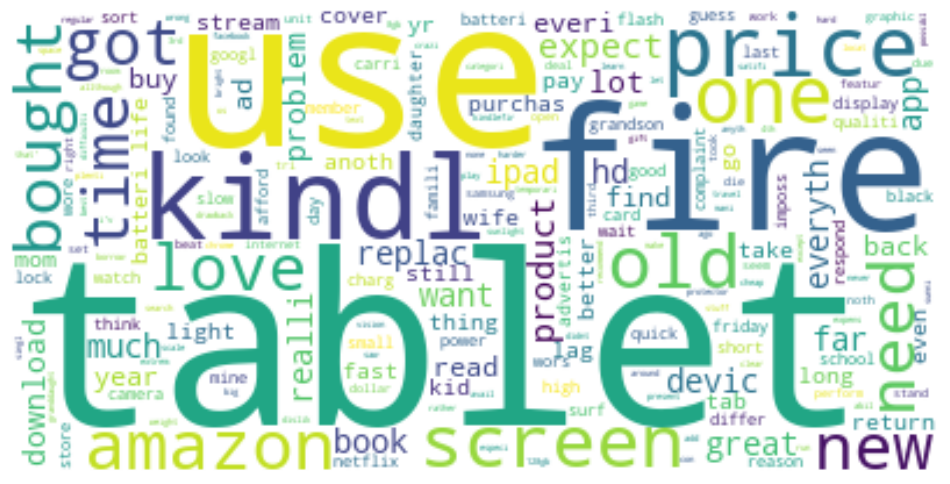

In [32]:
neg_tokens = [word for review in reviews_negative_subset['processed_review']for word in review]

wordlcloud = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))

plt.figure(figsize=(12,12))
plt.imshow(wordlcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

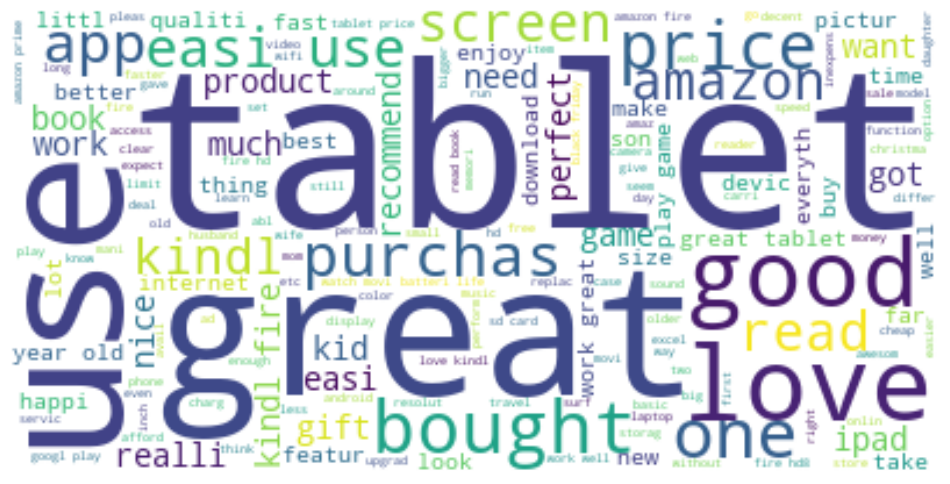

In [33]:
pos_tokens = [word for review in reviews_positive_subset['processed_review']for word in review]

wordlcloud = WordCloud(background_color='white').generate_from_text(' '.join(pos_tokens))

plt.figure(figsize=(12,12))
plt.imshow(wordlcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [34]:
from nltk.probability import FreqDist

pos_freqdist = FreqDist(pos_tokens)

pos_freqdist.tabulate(10)

tablet  great    use   love   good   easi  price  kindl   fire amazon 
   407    285    270    202    144    139    138    132    126    124 


In [35]:
from nltk.probability import FreqDist

neg_freqdist = FreqDist(neg_tokens)

neg_freqdist.tabulate(10)

tablet    use   fire  kindl  price    one    old screen amazon bought 
    25     19     17     12     12     10      9      9      8      7 


<Axes: xlabel='Samples', ylabel='Counts'>

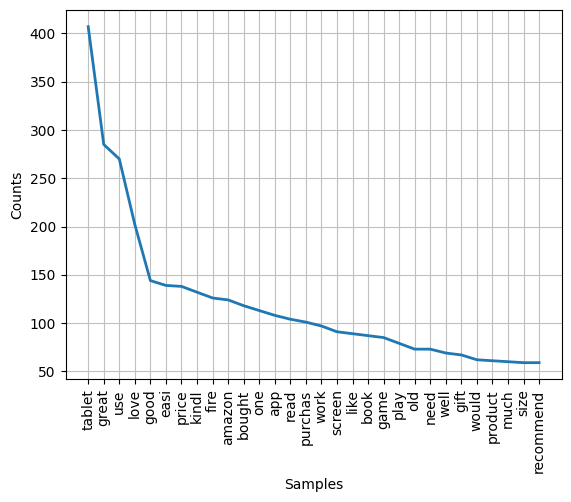

In [36]:
pos_freqdist.plot(30)

<Axes: xlabel='Samples', ylabel='Counts'>

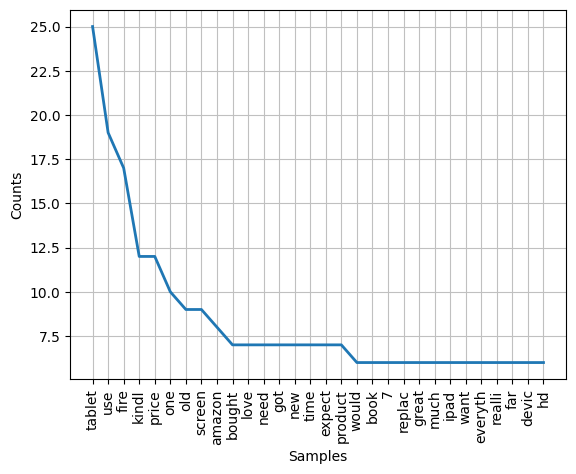

In [37]:
neg_freqdist.plot(30)